<a href="https://colab.research.google.com/github/garrettspringsted/STAT-7220-Applied-Experimental-Design/blob/main/Copy_of_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "garrettspringsted"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
   print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW1"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/garrettspringsted/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW1/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/garrettspringsted/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW1/STAT-7220-Applied-Experimental-Design/Assignments/HW1


# Homework 1: Completely Randomized Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: February 6, 2026**

**INSTRUCTIONS:** You are a quality control analyst for a craft brewery experimenting with a new India Pale Ale (IPA). One key quality attribute of IPA is its bitterness, measured in International Bitterness Units (IBUs). The brewery wants to determine if the aging time (3, 4, or 5 weeks) affects the IBUs of the beer. To test this, the brewing team brews a single batch of the experimental IPA and divides it into aging tanks, with each tank randomly assigned to be aged for 3, 4, or 5 weeks. After aging, the IBUs of ten randomly selected bottles from each aging time are measured using a spectrophotometer. The data are in the file `IPA.xlsx`. With these data, I want you to:

**Question 1.** Briefly define the objective of this experiment

**Answer 1.** The objective of this experiment is determing whether the aging time of beer affects the International Bitterness Units (IBU's) of the beer in each aging tank.


**Question 2.** Specify the outcome variable

**Answer 2.** The Outcome Variable(DV) of this experiment is the Level of IBU's in each tank of beer.


**Question 3.** Specify the independent variable. What are some possible lurking variables?

**Answer 3.** The Independent Variable(IV) of this ecperiment is the number of weeks the beer spent aging in the tanks.


**Question 4.** Briefly explain why a completely randomized design may be appropriate for this experiment.

**Answer 4.** The reason a completely randomized design may be approriate is due to the amount of variablity that can come from the experiments results. The main batch of brewed beer is the primary control and is randomly poured into each tank. Randomly, bottles are pulled from each aging group. This randomness supports the application for a completely randomized design. Due to the tanks having a constant source from the same primary batch of brew it solidifies that the aging time will be the main factor in determining the IBU levels for the beer.



**Question 5.** State the null and alternative hypotheses for this experiment.

-The Null Hypothesis for this experiment would be where Aging has no impact on the IBU of the Aging Groups

$$ H_0: \mu_1 = \mu_2 = \mu_3 $$

-The Alternative Hypothesis would be where at least one mean for Aging will differ.

$$  \begin{align} H_1: \mu_{\text{3weeks}} \neq \mu_{\text{4weeks}} \neq \mu_{\text{5weeks}}\\
H_1: \mu_{\text{3weeks}} \neq \mu_{\text{5weeks}}\\
H_1:\ \text{At least one } \mu \text{ differs}
\end{align}
$$




**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

**Answer 6.** In the summary analysis I can see that the mean between 3 Weeks and 4 Weeks is nearly 13 point difference in IBUs and the difference between 4 weeks and 5 weeks is slightly closer with a 7 point difference in IBUs. A difference of this many points may prove high significance.

When looking at the visual boxplot I can see that there is a bigger difference between Week 3 and Week 4 with minimal overlap which may prove significance. Weeks 4 and 5 both show more overlap indicating less differentiation though still significant enough difference. Overall the results are showing that we may lean towards the alternative hypothesis.


In [8]:
%pip install openpyxl

## Import pandas ##

import pandas as pd

## Import IPA.xlsx File ##

IPA_data = pd.read_excel("IPA.xlsx")

## Integrity Check ##

print(IPA_data.info())

## Group the dataframe by the "Weeks"
## column and calculate mean/sd for the
## "IBU" column ##

summary_stats = IPA_data.groupby('Weeks')['IBU'].agg(['mean','std'])

print(summary_stats)

## Calculate the Grand Mean of IBU ##

mu_hat = IPA_data['IBU'].mean()

## Calculate the group means of IBU, grouped by Weeks ##

group_means = IPA_data.groupby('Weeks')['IBU'].mean().reset_index()
group_means = group_means.rename(columns={'IBU': 'mean_IBU'})

## Calculate the difference between group means and the grand mean ##

tau_hat = group_means['mean_IBU'] - mu_hat

## Print Results ##

print("Grand Mean:", mu_hat)
print("\nGroup Means:")
print(group_means)
print("\nTau Hats:")
print(tau_hat)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weeks   30 non-null     object 
 1   IBU     30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes
None
           mean       std
Weeks                    
3 Weeks  49.216  8.300656
4 Weeks  62.751  8.250384
5 Weeks  69.725  5.631258
Grand Mean: 60.56399999999999

Group Means:
     Weeks  mean_IBU
0  3 Weeks    49.216
1  4 Weeks    62.751
2  5 Weeks    69.725

Tau Hats:
0   -11.348
1     2.187
2     9.161
Name: mean_IBU, dtype: float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weeks   30 non-null     object 
 1   IBU     30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes
None
           mean       std
Weeks                    
3 Weeks  49.216  8.300656
4 Weeks  62.751  8.250384
5 Weeks  69.725  5.631258


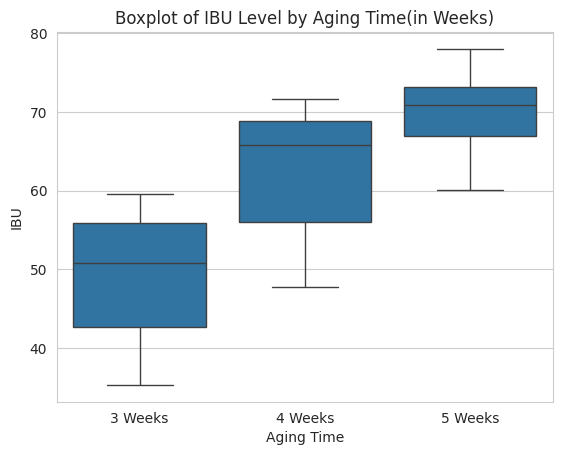

In [9]:
## Import Necessary Python Packages ##
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Read in IPA Rating Excel File ##

IPA_data = pd.read_excel("IPA.xlsx")

## Data Integrity Check ##

print(IPA_data.info())

## Calculate Mean and Standard Deviation
## of IPA IBU Levels by Weekly Aging ##

IPA_stats = IPA_data.groupby('Weeks')['IBU'].agg(['mean','std'])

print(IPA_stats)

## Generate Boxplot for Visual Comparison ##

## Set style (default is "darkgrid") ##

sns.set_style("whitegrid")

## Create boxplot ##

sns.boxplot(x="Weeks",y="IBU",data=IPA_data)

## Add Title and Labels ##

plt.title("Boxplot of IBU Level by Aging Time(in Weeks)", loc='center')
plt.xlabel("Aging Time")
plt.ylabel("IBU")
plt.show()



**Question 7.** Build a one-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

**Answer 7.** The points on the p-plot are generally aligned with normality with very small tail deviations. The Shapiro Wilkes result of .063 for the p-value supports normality so we fail to reject the null hypothesis. This output overall supports the assumption of normality.

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Fit One-Way ANOVA Model ##

mod = ols("IBU ~ Weeks", data=IPA_data).fit()

## Get the ANOVA table ##

IPA_tab = sm.stats.anova_lm(mod,typ=1)

print(IPA_tab)

            df      sum_sq      mean_sq          F    PR(>F)
Weeks      2.0  2174.83994  1087.419970  19.339842  0.000006
Residual  27.0  1518.12718    56.226933        NaN       NaN


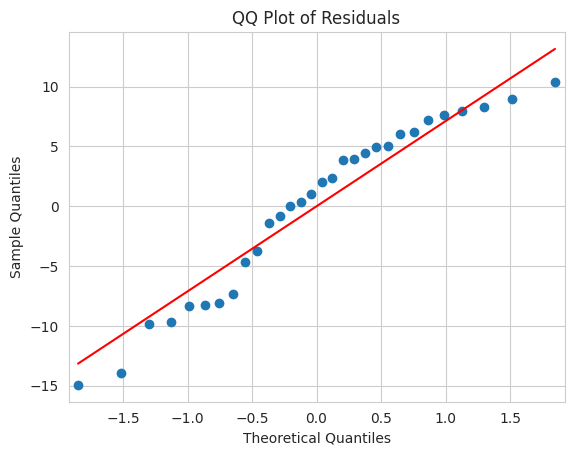

In [11]:
import matplotlib.pyplot as plt

IPA_mod = ols("IBU~Weeks",data=IPA_data).fit()

## Extract Model Residuals ##

residuals = IPA_mod.resid

## Generate QQ plot using seaborn ##

sm.qqplot(residuals, line ='s')
plt.title("QQ Plot of Residuals")
plt.show()

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import pandas as pdz
import seaborn as sns

# Assuming IPA_data is available from a previously executed cell

## Import IPA.xlsx File (Added this line to define IPA_data) ##
IPA_data = pd.read_excel("IPA.xlsx")

## Fit One-Way ANOVA Model to get residuals ##
IPA_mod = ols("IBU~Weeks",data=IPA_data).fit()

## Extract Model Residuals ##
residuals = IPA_mod.resid

## Perform Shapiro-Wilk Test of Normality ##
sw_test = stats.shapiro(residuals)
## Extract Test Stat and P-Value ##
sw_stat = sw_test.statistic
sw_pvalue = sw_test.pvalue
## Print Results ##
print(f"Shapiro-Wilk Test Statistic: {sw_stat:.4f}")
print(f"Shapiro-Wilk Test P-Value: {sw_pvalue:.4f}")
if sw_pvalue > 0.05:
    print("Fail to reject null hypothesis: Residuals are normally distributed.")
else:
    print("Reject null hypothesis: Residuals are not normally distributed.")

Shapiro-Wilk Test Statistic: 0.9341
Shapiro-Wilk Test P-Value: 0.0630
Fail to reject null hypothesis: Residuals are normally distributed.




**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

**Answer Question 8.** In the visual model I can see a fairly balance distribution around 0 with no distinct funneling or patterning. Spread appears consistent and all points fall within +/- 3.
In the Bruesch-Pagan Test the p-value is p>0.05 which mean we fail to reject the Null Hypothesis.
Based on these results the tests support the assumption of homogeneity of variance.

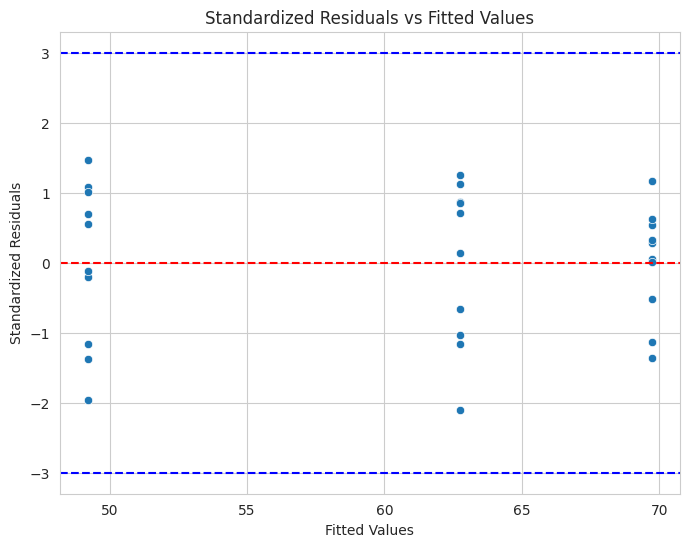

In [14]:
## Obtain Standardized Residuals ##

standardized_residuals = IPA_mod.get_influence().resid_studentized_internal

## Get the fitted values ##

fitted_values = IPA_mod.fittedvalues

## Create the plot using seaborn ##

plt.figure(figsize=(8,6))
sns.scatterplot(x=fitted_values, y=standardized_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.axhline(3, color='blue', linestyle='--')
plt.axhline(-3, color='blue', linestyle='--')
plt.title("Standardized Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")
plt.show()

In [15]:
## Import necessary function: ##

from statsmodels.stats.diagnostic import het_breuschpagan

## Run B-P Test ##

bp_test = het_breuschpagan(IPA_mod.resid,IPA_mod.model.exog)

## Extract F-statistic ##

f_statistic = bp_test[2]

## Extract its P-Value ##

f_p_value = bp_test[3]

print(f"BP Test F-statistic: {f_statistic}")
print(f"BP Test F p-value: {f_p_value}")
if f_p_value > 0.05:
    print("Fail to reject null hypothesis: Homoscedasticity detected. Constant Variance assumed.")
else:
    print("Reject null hypothesis: Heteroscedasticity detected. Constant Variance not assumed.")

BP Test F-statistic: 1.2952914537529732
BP Test F p-value: 0.2902941540365849
Fail to reject null hypothesis: Homoscedasticity detected. Constant Variance assumed.




**Question 9.** Report the F-statistic and its associated p-value from the one-way ANOVA model. Which of our two hypotheses is more strongly supported? Why?

**Answer 9.** With the P-value of 0.000006 being much smaller than 0.05 the Null Hypothesis is rejected. This means the alternative is supported which then tells us that at least one mean average IBU is different. The higher f-value also supports the claim that there is significant difference within the group means.

In [16]:
IPA_tab = sm.stats.anova_lm(mod,typ=1)

print(IPA_tab)

            df      sum_sq      mean_sq          F    PR(>F)
Weeks      2.0  2174.83994  1087.419970  19.339842  0.000006
Residual  27.0  1518.12718    56.226933        NaN       NaN




**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which aging times are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

**Answer 9.** The data does support the Alternative hypothesis so a Tukey's post-hoc test was performed. The results show that there was a significant mean difference between weeks 3 and 4, 3 and 5, but not as significant(not significant) between 4 and 5.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
3 Weeks 4 Weeks   13.535 0.0011  5.2205 21.8495   True
3 Weeks 5 Weeks   20.509    0.0 12.1945 28.8235   True
4 Weeks 5 Weeks    6.974 0.1131 -1.3405 15.2885  False
------------------------------------------------------


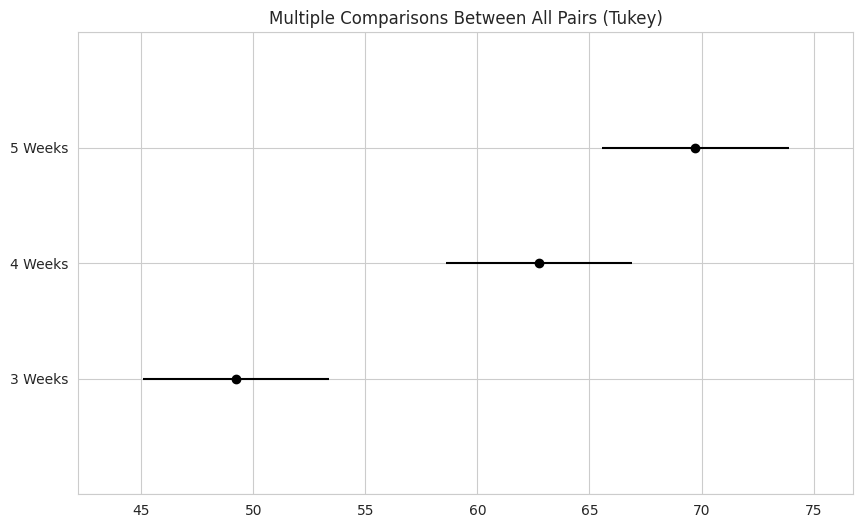

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Perform Tukey's HSD test ##

tukey_result = pairwise_tukeyhsd(endog=IPA_data['IBU'], groups=IPA_data['Weeks'],
                                 alpha=0.05)

## Print Tukey Visualization ##

tukey_result.plot_simultaneous()

## Print Tukey Table ##

print(tukey_result)



**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses. Additionally, describe any limitations of the experiment and/or your analyses, and suggest potential improvements for future experiments of this nature.


**Answer 11.** The goal of this experiment was to determine whether aging time affected the IBU levels in IPA Beer. Beginning with exploratory analysis I was able to see a clear mean increase in IBUs between week 3 and weeks 4-5. This was confirmed with both my ANOVA table which produced a P-value of 0.000006, which is statistically significant. Residuals showed reasonable normality based on a Q-Q Plot and Shapiro test. We also confirmed constant variance via the Bruesch-Pagan Test where our p-value of 0.29 failed to reject the null hypothesis.

A couple limitations may be that since all groups were taken from a single batch of brew beer it has limited scope in terms of beer making. Each brew batch may have unique characteristics depending on many factors including the source of ingredients, time of year, and storage of materials before brewing. The batches may be more or less "active" in fermentation. This coul be improved by increasing the number of brew batches as well as more test tanks spread over the course of a year to get a better 'average' overall.
